# Experiment results

This notebook computes some results for a given experiment. It does not aggregate over all experiments.

In [1]:
EXPERIMENT = 64

In [2]:
%cd ../..
%matplotlib inline

D:\Projects\Python\PL-Heuristic


In [3]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from analysis.caching import get_cached_results, has_cached_results, store_results
from analysis.measures import compute_measures

In [4]:
# Computing the measures for an entire experiment can be quite slow, so we normally
# work with cached data.
if has_cached_results(EXPERIMENT):
    results = get_cached_results(EXPERIMENT)
else:
    results = compute_measures(EXPERIMENT)
    store_results(EXPERIMENT, results)

# Analysis

In [5]:
# Sanity check
assert len(results) == 100

In [6]:
df = pd.DataFrame(results, index=np.arange(1, 101))
df.describe()

,heuristic_classroom_utilisation,heuristic_instruction_size,heuristic_objective,heuristic_percentage_instruction,heuristic_percentage_self_study,heuristic_self_study_size,heuristic_teacher_utilisation,ilp_classroom_utilisation,ilp_instruction_size,ilp_objective,ilp_percentage_instruction,ilp_percentage_self_study,ilp_self_study_size,ilp_teacher_utilisation
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,85.228916,6.820157,3907.558429,46.392500,53.607500,26.627028,88.425000,88.831325,6.622667,4000.226130,49.670000,50.330000,29.439866,92.162500
std,2.661863,0.299066,77.647973,2.907943,2.907943,2.568125,2.761683,1.441467,0.304341,77.704083,2.282559,2.282559,1.385559,1.495522
min,79.518072,6.241379,3715.945777,40.250000,46.875000,19.428571,82.500000,85.542169,6.066667,3817.583199,45.500000,44.375000,26.625000,88.750000
25%,83.132530,6.582198,3863.393269,44.343750,51.625000,25.290033,86.250000,87.951807,6.383333,3955.701753,47.875000,48.718750,28.383333,91.250000
50%,85.542169,6.792695,3909.458192,46.375000,53.625000,26.892857,88.750000,89.156627,6.591667,4010.052562,49.437500,50.562500,29.357143,92.500000
75%,86.746988,7.079622,3962.624025,48.375000,55.656250,28.475000,90.000000,90.361446,6.837500,4049.052654,51.281250,52.125000,30.384615,93.750000
max,91.566265,7.545455,4091.417710,53.125000,59.750000,30.769231,95.000000,91.566265,7.416667,4208.638826,55.625000,54.500000,33.000000,95.000000


## Objective

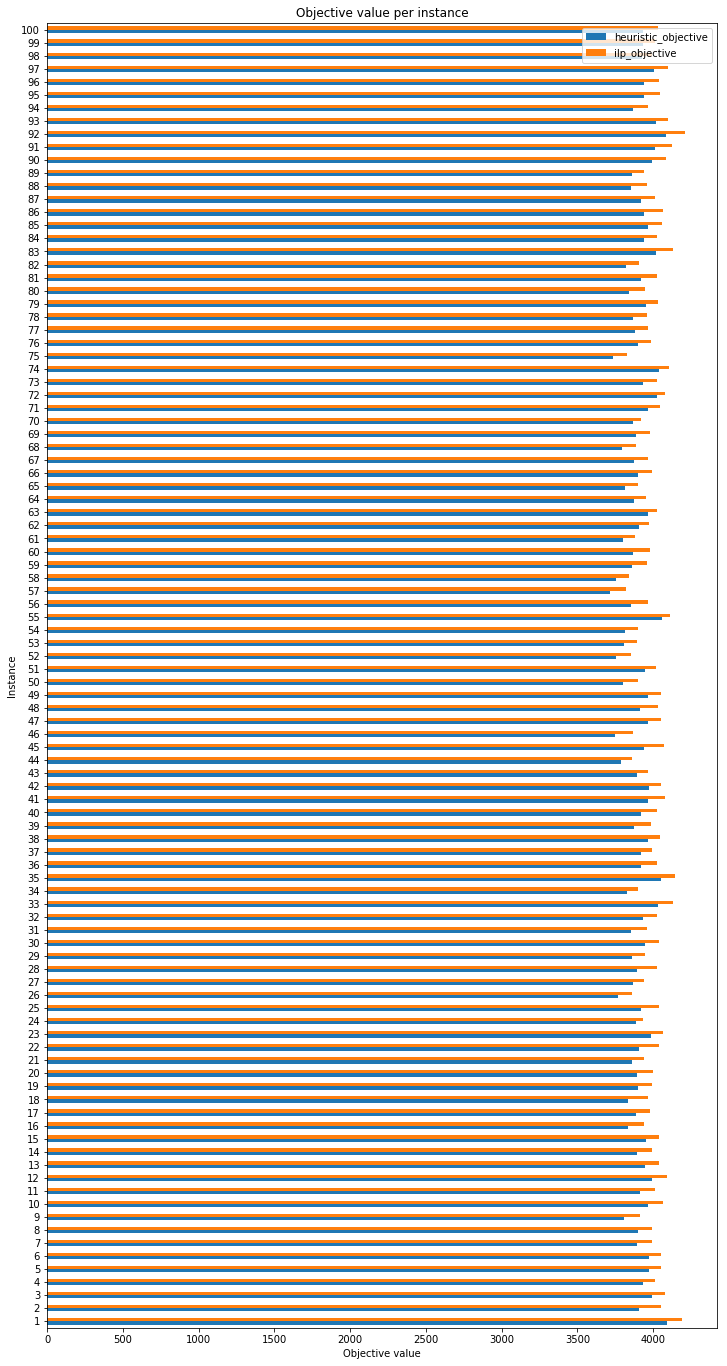

In [7]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Objective value per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Objective value")

df[["heuristic_objective", "ilp_objective"]].plot.barh(ax=ax)

In [8]:
heuristic_objective = df['heuristic_objective'].mean()
ilp_objective = df['ilp_objective'].mean()

difference = 100 * (heuristic_objective - ilp_objective) / ilp_objective

print(f"Percentage difference between heuristic and optimal solution is {difference:.2f}%.")
print(f"The averages are {ilp_objective:.2f} (ilp), against {heuristic_objective:.2f} (heuristic).")

Percentage difference between heuristic and optimal solution is -2.32%.
The averages are 4000.23 (ilp), against 3907.56 (heuristic).


## Percentages instruction and self-study

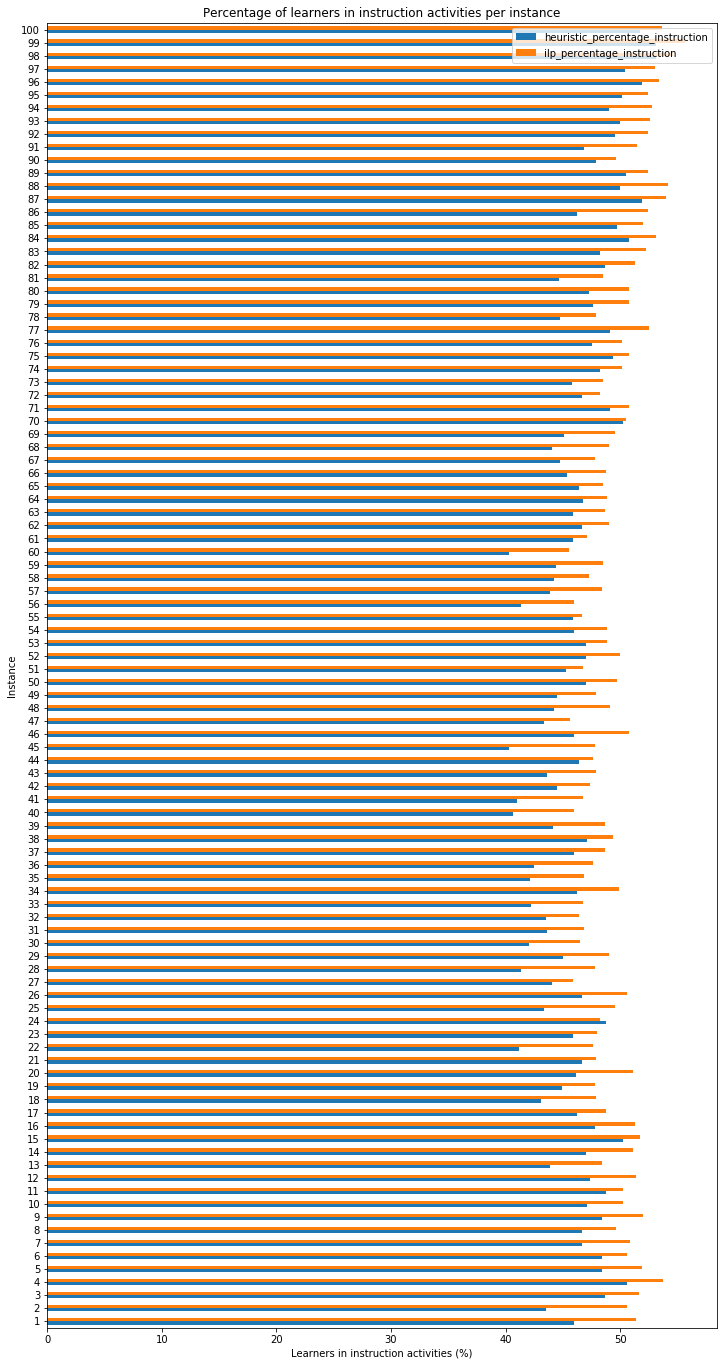

In [9]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Percentage of learners in instruction activities per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Learners in instruction activities (%)")

df[["heuristic_percentage_instruction", "ilp_percentage_instruction"]].plot.barh(ax=ax)

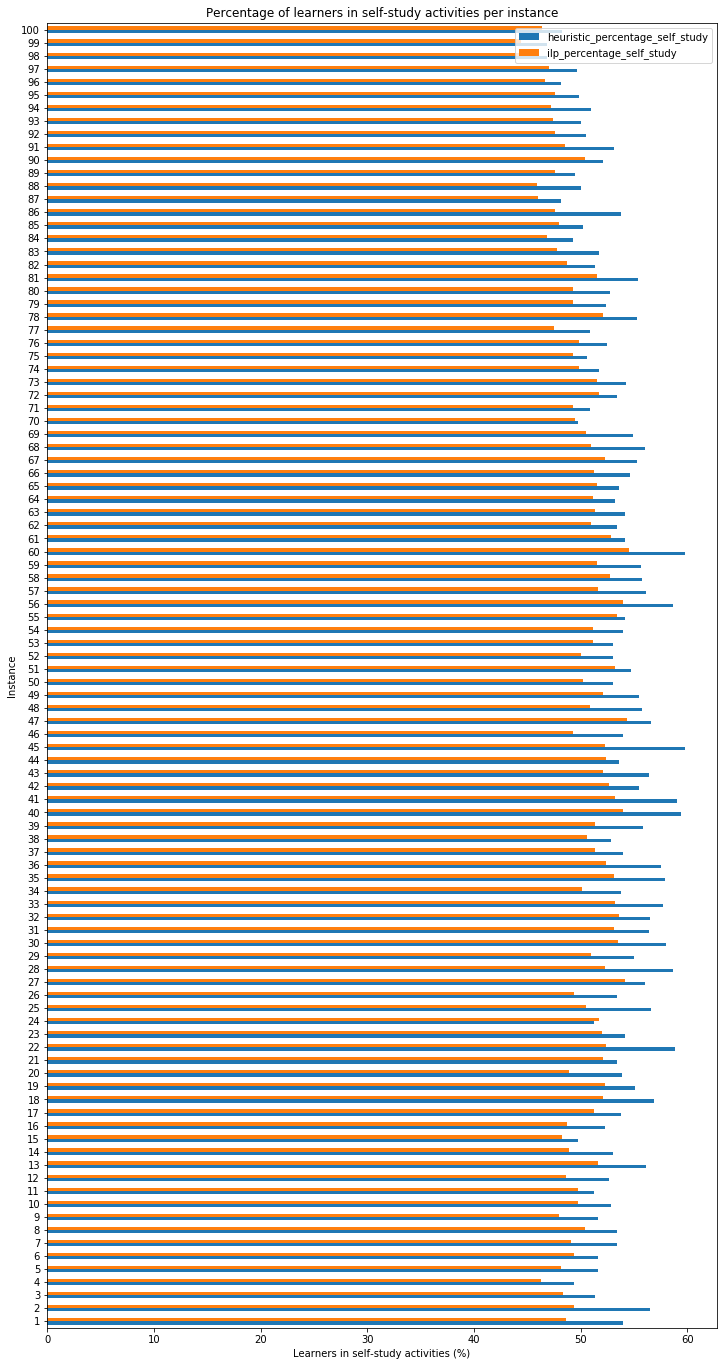

In [10]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Percentage of learners in self-study activities per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Learners in self-study activities (%)")

df[["heuristic_percentage_self_study", "ilp_percentage_self_study"]].plot.barh(ax=ax)

In [11]:
heuristic_percentage_self_study = df['heuristic_percentage_self_study'].mean()
ilp_percentage_self_study = df['ilp_percentage_self_study'].mean()

difference = 100 * (heuristic_percentage_self_study - ilp_percentage_self_study) / ilp_percentage_self_study

print(f"On average, the heuristic solution has {difference:.2f}% more learners in self-study activities.")
print(f"The averages are {ilp_percentage_self_study:.2f}% (ilp), against {heuristic_percentage_self_study:.2f}% (heuristic).")

On average, the heuristic solution has 6.51% more learners in self-study activities.
The averages are 50.33% (ilp), against 53.61% (heuristic).


## Activity sizes

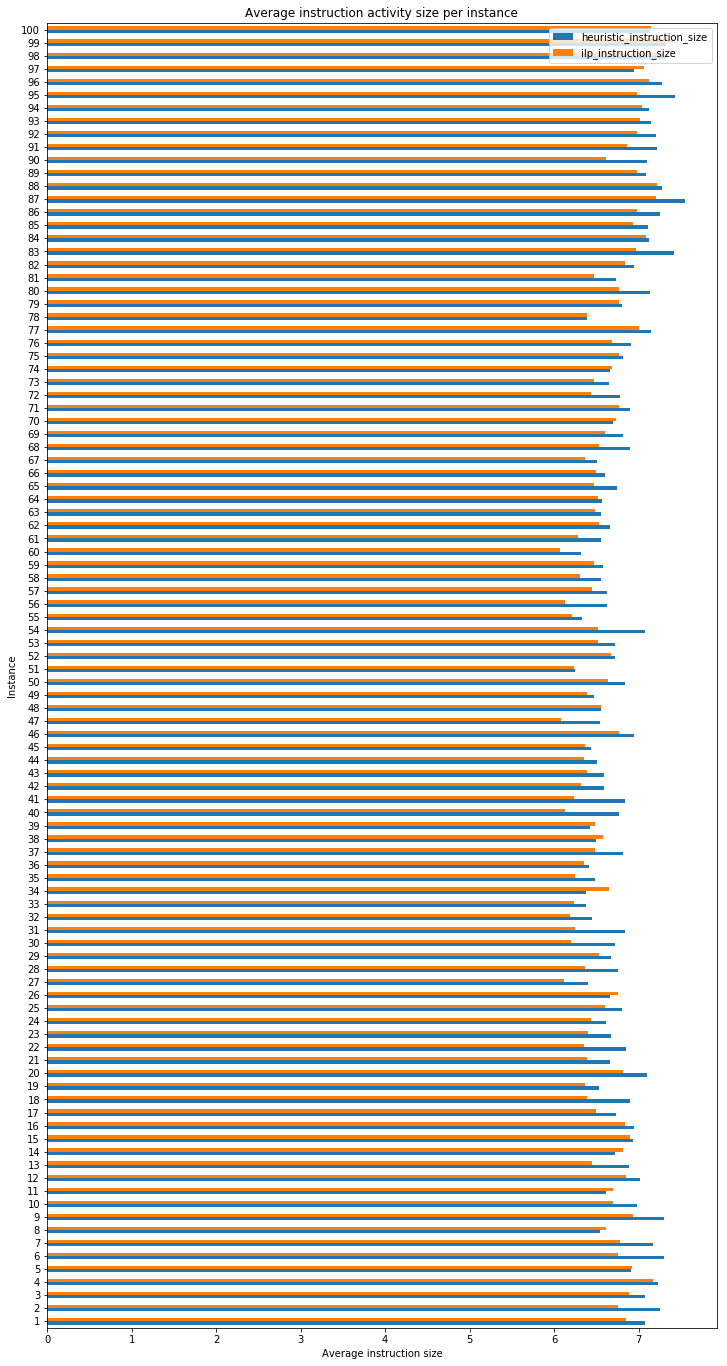

In [12]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Average instruction activity size per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Average instruction size")

df[["heuristic_instruction_size", "ilp_instruction_size"]].plot.barh(ax=ax)

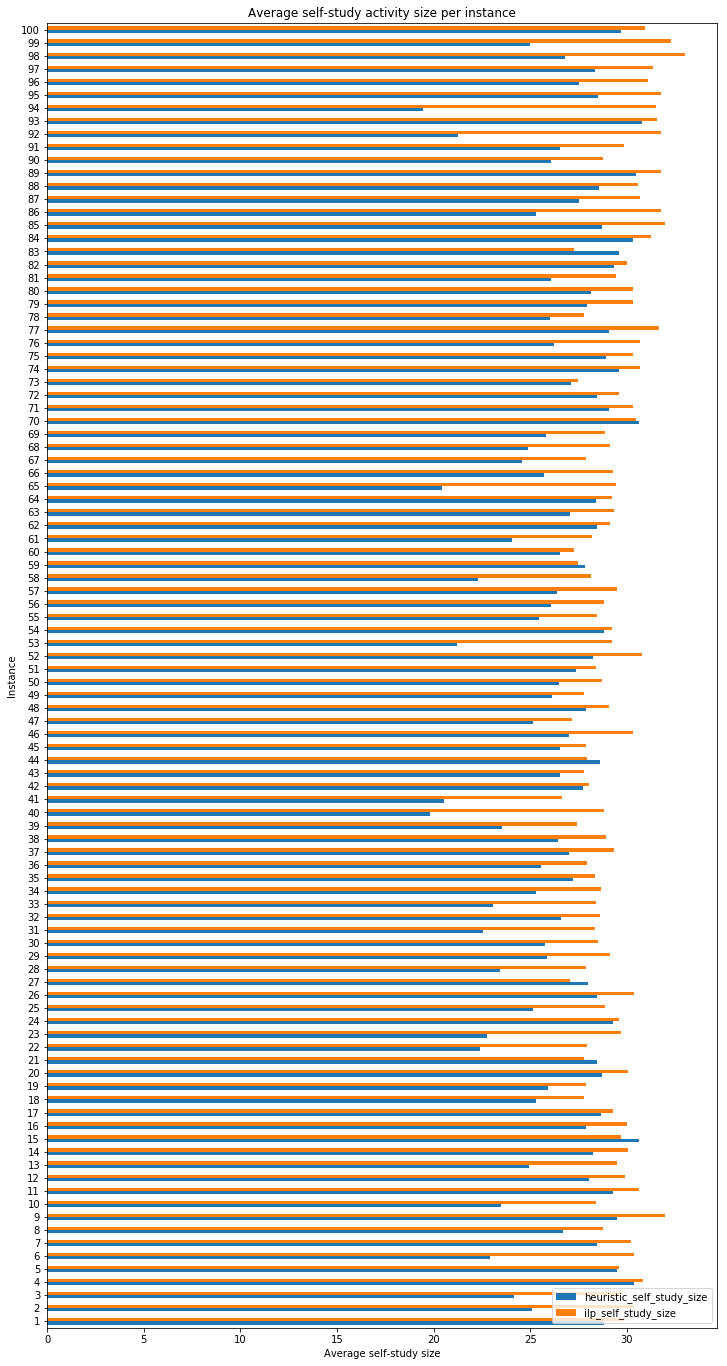

In [13]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Average self-study activity size per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Average self-study size")

df[["heuristic_self_study_size", "ilp_self_study_size"]].plot.barh(ax=ax)

# Classroom and teacher pool utilisation

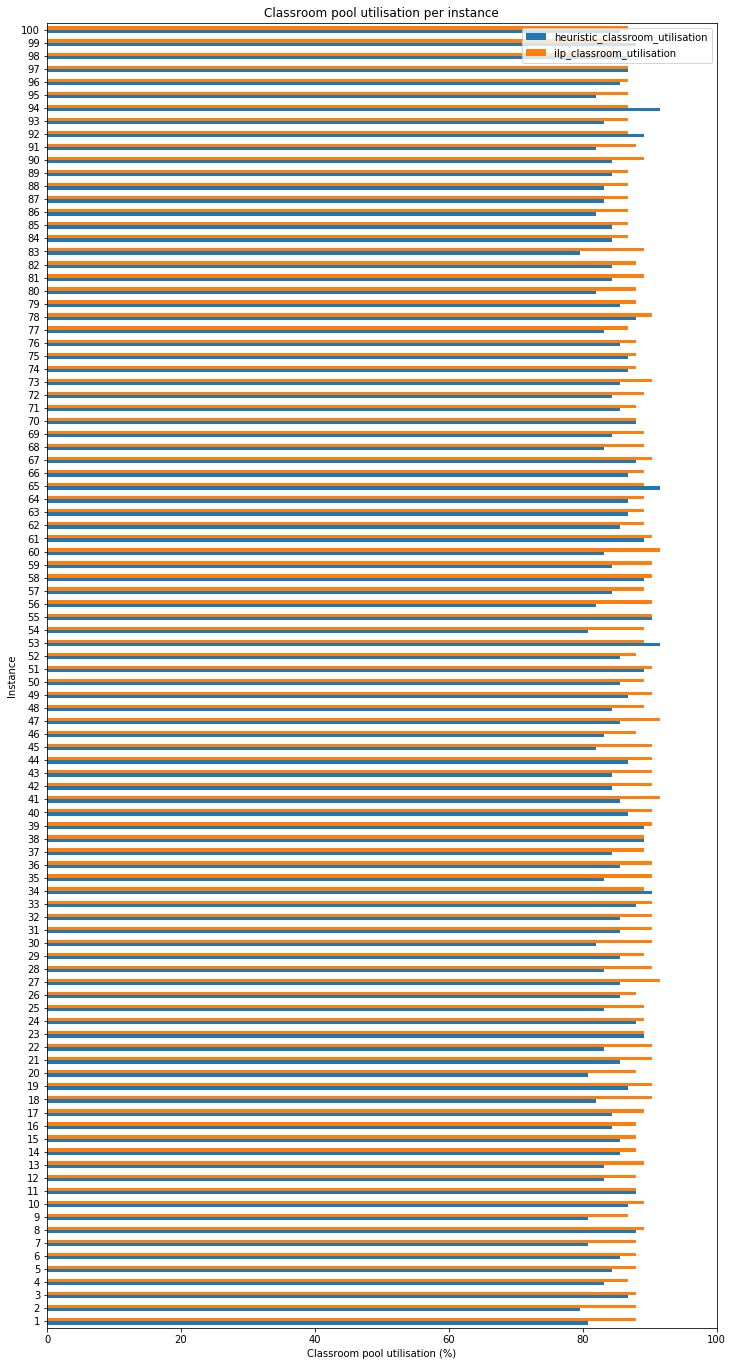

In [14]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_xlim(0, 100)
ax.set_title("Classroom pool utilisation per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Classroom pool utilisation (%)")

df[["heuristic_classroom_utilisation", "ilp_classroom_utilisation"]].plot.barh(ax=ax)

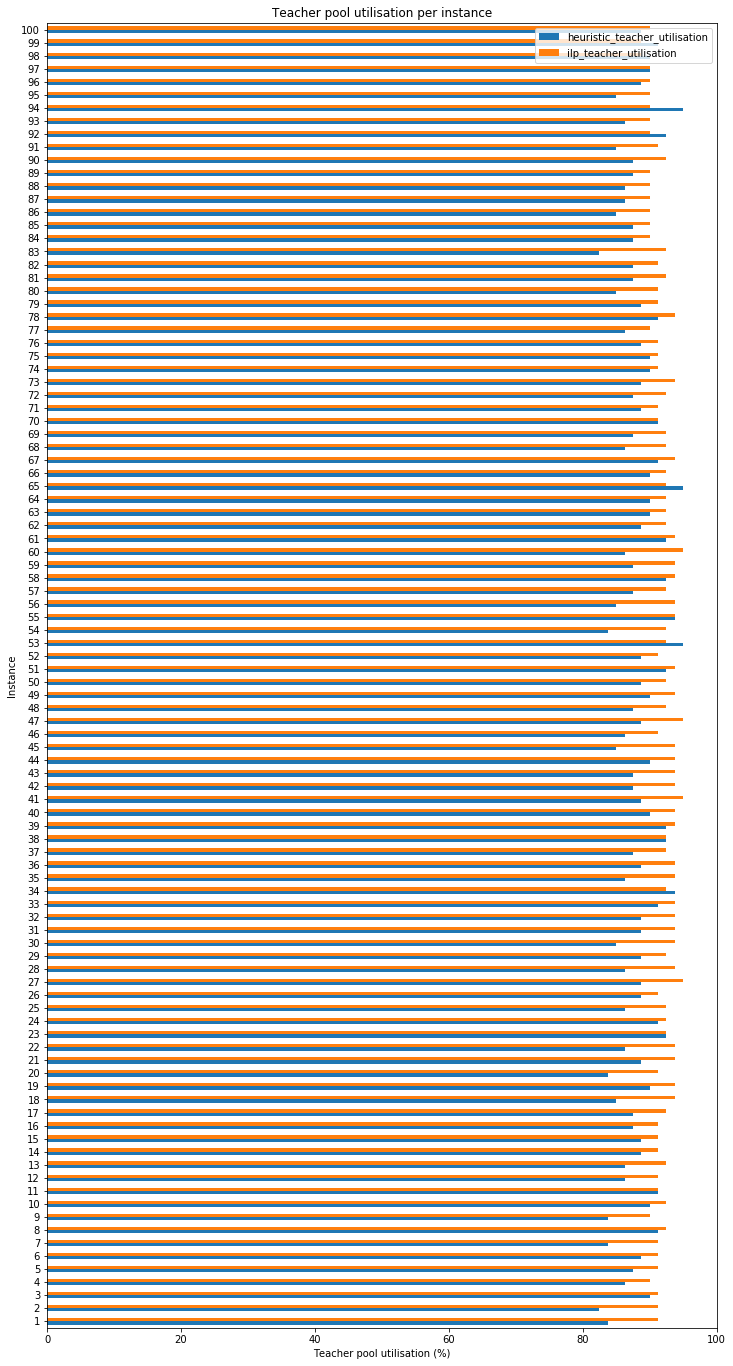

In [15]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_xlim(0, 100)
ax.set_title("Teacher pool utilisation per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Teacher pool utilisation (%)")

df[["heuristic_teacher_utilisation", "ilp_teacher_utilisation"]].plot.barh(ax=ax)